from google.colab import drive
drive.mount('/content/drive')

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w

w.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("max_colwidth", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [3]:
df = pd.read_csv(r"C:\Users\harsh\ML Assign\Data Sets\MLK\Social_Network_Ads.csv")

In [4]:
df.describe()


,User ID,Age,EstimatedSalary,Purchased
count,400.000,400.000,400.000,400.000
mean,15691539.758,37.655,69742.500,0.357
std,71658.322,10.483,34096.960,0.480
min,15566689.000,18.000,15000.000,0.000
25%,15626763.750,29.750,43000.000,0.000
50%,15694341.500,37.000,70000.000,0.000
75%,15750363.000,46.000,88000.000,1.000
max,15815236.000,60.000,150000.000,1.000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df.drop("User ID", axis=1, inplace=True)
df = pd.get_dummies(
    data=df,
    columns=["Gender"],
    drop_first=True,
)
df = df.iloc[:, [0, 1, 3, 2]]

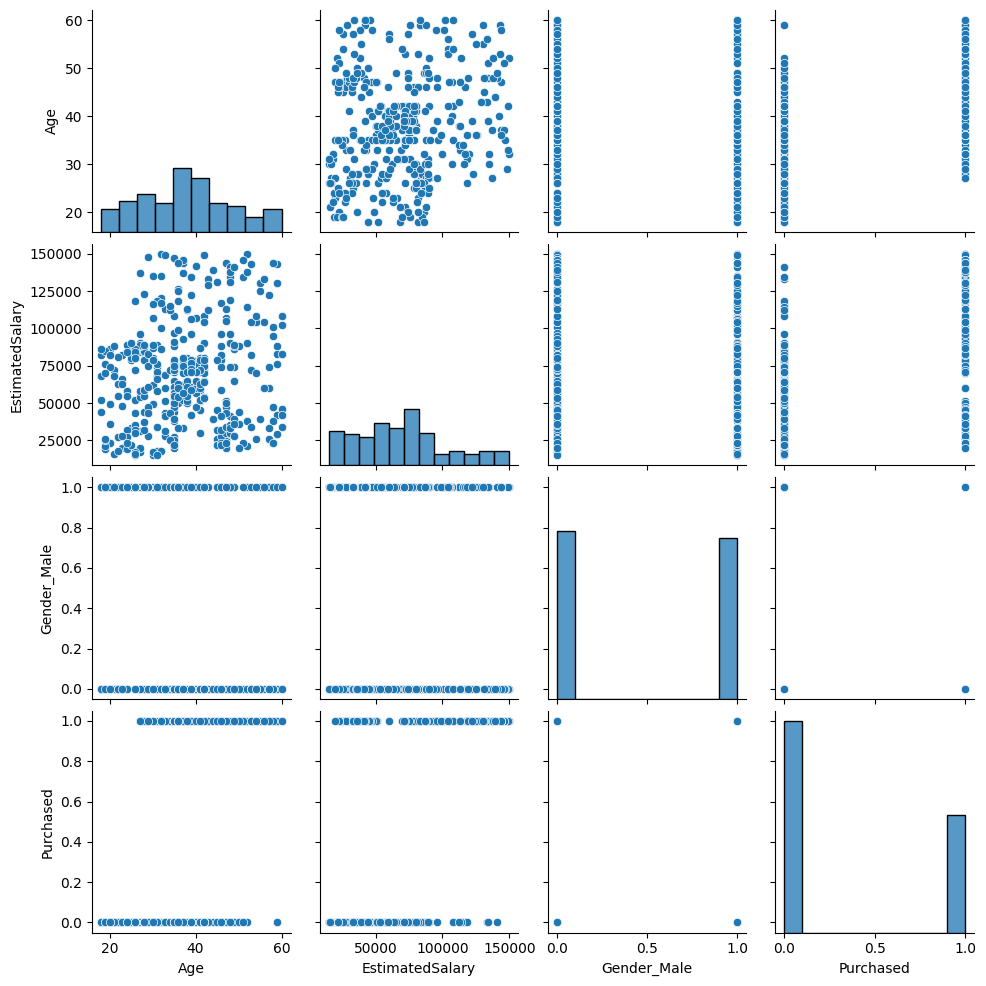

In [8]:
sns.pairplot(df)


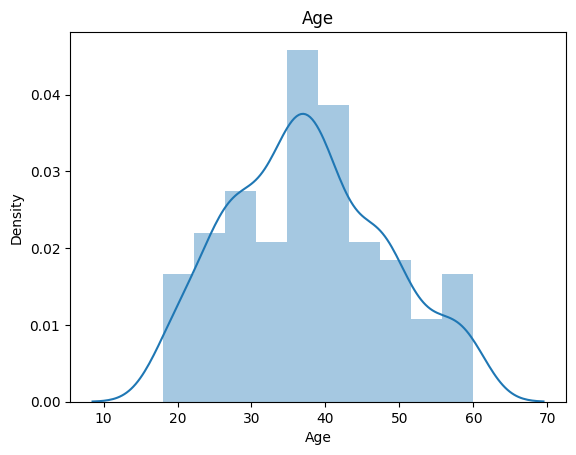

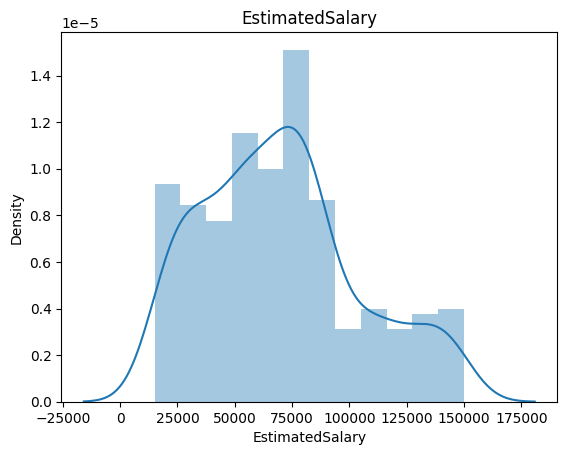

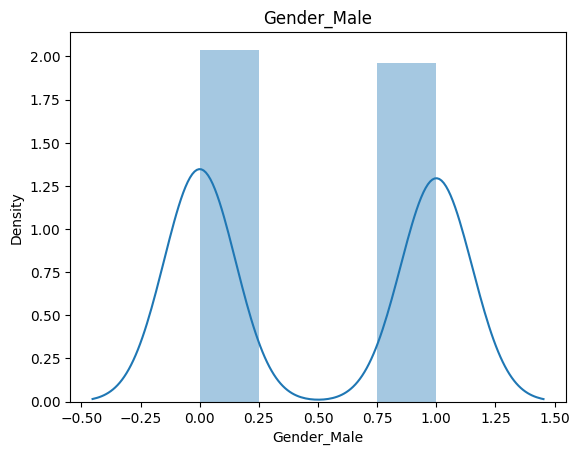

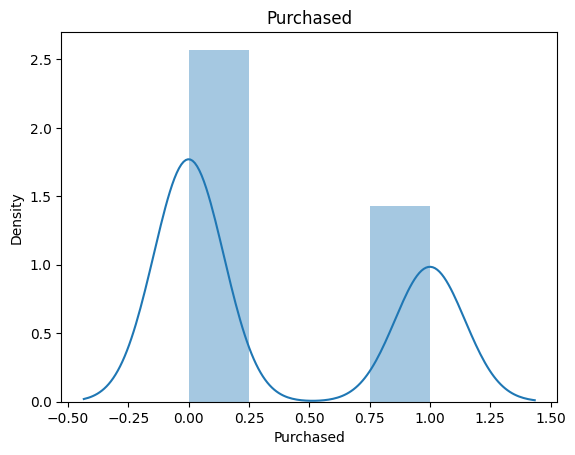

In [9]:
for i in df.columns:
    plt.title(i)
    sns.distplot(df[i])
    plt.show()


<Axes: >

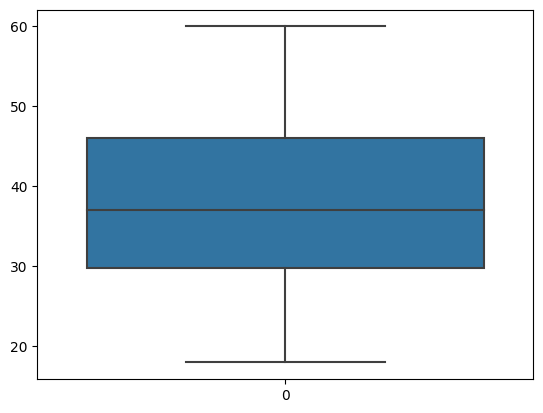

In [10]:
sns.boxplot(df.Age)


<Axes: >

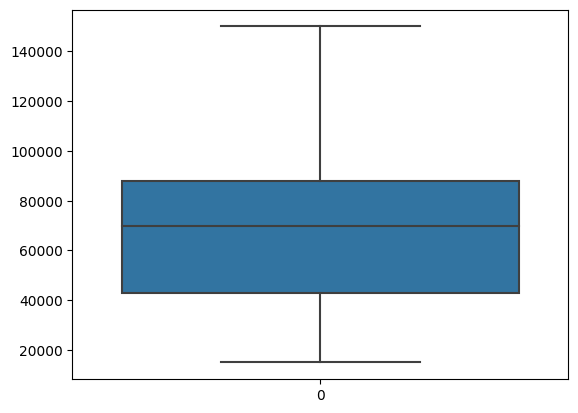

In [11]:
sns.boxplot(df.EstimatedSalary)


<Axes: >

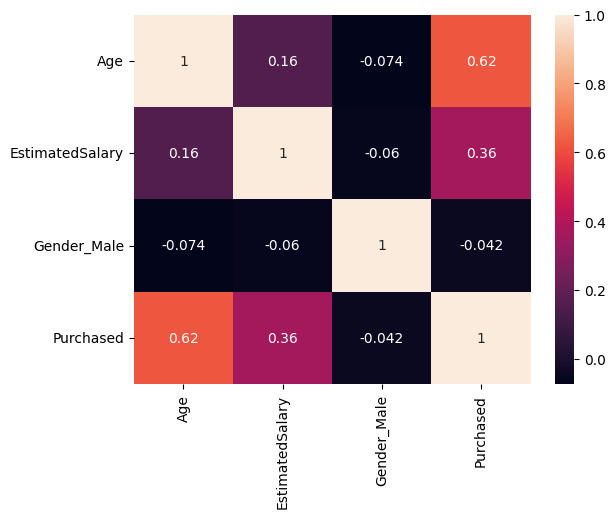

In [12]:
sns.heatmap(df.corr(), annot=True)

df.Gender_Male = df.Gender_Male.astype('category')

In [13]:
# Splitting the data into X and y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Modeling

In [14]:
# Importing the Splitting and Preprocessing Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101, stratify=y
)

# Feature Scaling
sc = StandardScaler()
# Scaling only first 2 columns
X_train.iloc[:, :2] = sc.fit_transform(X_train.iloc[:, :2])
X_test.iloc[:, :2] = sc.transform(X_test.iloc[:, :2])

In [15]:
# Importing the Machine Learning Libraries
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Importing the Evaluation Metrics

from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    f1_score,
    recall_score,
    precision_score,
)

In [16]:
# Creating a list with model name and model
models = [
    ("GaussianNB", GaussianNB()),
    ("BernoulliNB", BernoulliNB()),
    ("LogisticRegression", LogisticRegression()),
    ("DecisionTreeClassifier", DecisionTreeClassifier()),
    ("RandomForestClassifier", RandomForestClassifier(n_estimators=250)),
    ("CatBoostClassifier", CatBoostClassifier(verbose=0)),
    ("XGBClassifier", XGBClassifier(verbosity=0)),
]

In [17]:
model_dict = {}
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_dict[name] = [
        accuracy_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_pred),
    ]
    pass

model_df = pd.DataFrame(
    model_dict, index=["Accuracy", "Recall",
                       "Precision", "F1 Score", "ROC AUC Score"]
).T
model_df.sort_values(by="ROC AUC Score", ascending=False) * 100


,Accuracy,Recall,Precision,F1 Score,ROC AUC Score
CatBoostClassifier,86.667,79.070,82.927,80.952,84.989
RandomForestClassifier,85.833,76.744,82.500,79.518,83.827
DecisionTreeClassifier,85.000,76.744,80.488,78.571,83.177
XGBClassifier,84.167,74.419,80.000,77.108,82.014
GaussianNB,84.167,65.116,87.500,74.667,79.961
LogisticRegression,81.667,55.814,88.889,68.571,75.959
BernoulliNB,77.500,51.163,78.571,61.972,71.685


<Axes: >

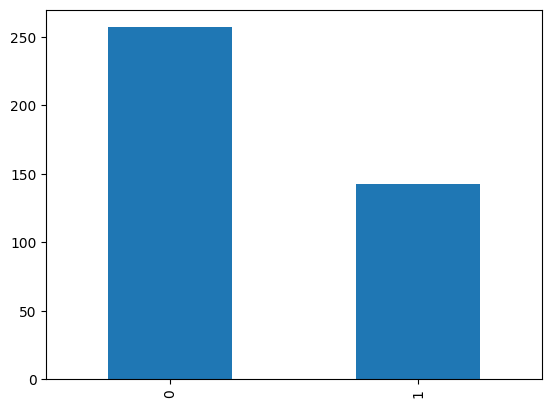

In [18]:
y.value_counts().plot(kind="bar")

>  ### Now we will use SMOTE to balance the data and then apply the models to check the performance.

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
XR, yR = smote.fit_resample(X, y)
XR_train, XR_test, yR_train, yR_test = train_test_split(
    XR, yR, test_size=0.3, random_state=101, stratify=yR
)


In [20]:
# Scaling only first 2 columns

XR_train.iloc[:, :2] = sc.fit_transform(XR_train.iloc[:, :2])
XR_test.iloc[:, :2] = sc.transform(XR_test.iloc[:, :2])

In [21]:
model_dict = {}
for name, model in models:
    model.fit(XR_train, yR_train)
    y_pred = model.predict(XR_test)
    model_dict[name] = [
        accuracy_score(yR_test, y_pred),
        recall_score(yR_test, y_pred),
        precision_score(yR_test, y_pred),
        f1_score(yR_test, y_pred),
        roc_auc_score(yR_test, y_pred),
    ]
    pass

model_df = pd.DataFrame(
    model_dict, index=["Accuracy", "Recall",
                    "Precision", "F1 Score", "ROC AUC Score"]
).T
model_df.sort_values(by="ROC AUC Score", ascending=False) * 100


,Accuracy,Recall,Precision,F1 Score,ROC AUC Score
CatBoostClassifier,90.968,91.026,91.026,91.026,90.967
RandomForestClassifier,90.323,93.590,87.952,90.683,90.301
DecisionTreeClassifier,89.032,87.179,90.667,88.889,89.044
GaussianNB,89.032,91.026,87.654,89.308,89.019
XGBClassifier,87.742,89.744,86.420,88.050,87.729
LogisticRegression,83.226,82.051,84.211,83.117,83.233
BernoulliNB,79.355,79.487,79.487,79.487,79.354
